In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import os

import tensorflow as tf

In [ ]:
%matplotlib inline

In [ ]:
model = tf.keras.models.load_model('/content/gdrive/MyDrive/CS4243/saved_models/resnet50v2-finetuned-20221030-053213')

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50v2 (Functional)     (None, 2048)              23564800  
                                                                 
 dense (Dense)               (None, 120)               245880    
                                                                 
 dropout (Dropout)           (None, 120)               0         
                                                                 
 dense_1 (Dense)             (None, 84)                10164     
                                                                 
 dropout_1 (Dropout)         (None, 84)                0         
                                                                 
 dense_2 (Dense)             (None, 3)                 255   

In [ ]:
def load_img(file_path, image_size=[224, 224]):
    img = tf.keras.preprocessing.image.load_img(file_path, target_size=image_size)
    label = file_path.split(os.path.sep)[-2]
    return img, label

In [ ]:
class_names = ['carrying', 'normal', 'threat']

In [ ]:
def get_predicted_label(img, model):
    normalize = tf.keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = normalize(img_array)
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array, verbose=0)
    return class_names[int(tf.argmax(predictions, axis=1).numpy())]

In [ ]:
def plot_img_and_labels(img, actual, predicted):
    plt.imshow(img)
    plt.xlabel(f'Predicted: {predicted}\nActual: {actual}', fontsize=14)
    plt.xticks([])
    plt.yticks([])

In [ ]:
lst = []

In [ ]:
img_dir = '/content/gdrive/MyDrive/CS4243/data/carrying'
for root, _, files in os.walk(img_dir):
    for name in files:
        img_path = os.path.join(root, name)
        img, label = load_img(img_path)
        predicted = get_predicted_label(img, model)
        if predicted == 'threat':
            print(img_path)
            lst.append((img, label, predicted))
            break

/content/gdrive/MyDrive/CS4243/data/carrying/carrying-122.jpg


In [ ]:
img_dir = '/content/gdrive/MyDrive/CS4243/data/carrying'
for root, _, files in os.walk(img_dir):
    for name in files:
        img_path = os.path.join(root, name)
        img, label = load_img(img_path)
        predicted = get_predicted_label(img, model)
        if predicted == 'normal':
            print(img_path)
            lst.append((img, label, predicted))
            break

/content/gdrive/MyDrive/CS4243/data/carrying/carrying-95.jpg


In [ ]:
img_dir = '/content/gdrive/MyDrive/CS4243/data/normal'
for root, _, files in os.walk(img_dir):
    for name in files:
        img_path = os.path.join(root, name)
        img, label = load_img(img_path)
        predicted = get_predicted_label(img, model)
        if predicted == 'threat':
            print(img_path)
            lst.append((img, label, predicted))
            break

/content/gdrive/MyDrive/CS4243/data/normal/normal-1317.jpg


In [ ]:
img_dir = '/content/gdrive/MyDrive/CS4243/data/normal'
for root, _, files in os.walk(img_dir):
    for name in files:
        img_path = os.path.join(root, name)
        img, label = load_img(img_path)
        predicted = get_predicted_label(img, model)
        if predicted == 'carrying':
            print(img_path)
            lst.append((img, label, predicted))
            break

/content/gdrive/MyDrive/CS4243/data/normal/normal-1308.jpg


In [ ]:
img_dir = '/content/gdrive/MyDrive/CS4243/data/threat'
for root, _, files in os.walk(img_dir):
    for name in files:
        img_path = os.path.join(root, name)
        img, label = load_img(img_path)
        predicted = get_predicted_label(img, model)
        if predicted == 'carrying':
            print(img_path)
            lst.append((img, label, predicted))
            break

/content/gdrive/MyDrive/CS4243/data/threat/threat-944.jpg


In [ ]:
img_dir = '/content/gdrive/MyDrive/CS4243/data/threat'
for root, _, files in os.walk(img_dir):
    for name in files:
        img_path = os.path.join(root, name)
        img, label = load_img(img_path)
        predicted = get_predicted_label(img, model)
        if predicted == 'normal':
            print(img_path)
            lst.append((img, label, predicted))
            break

/content/gdrive/MyDrive/CS4243/data/threat/threat-861.jpg


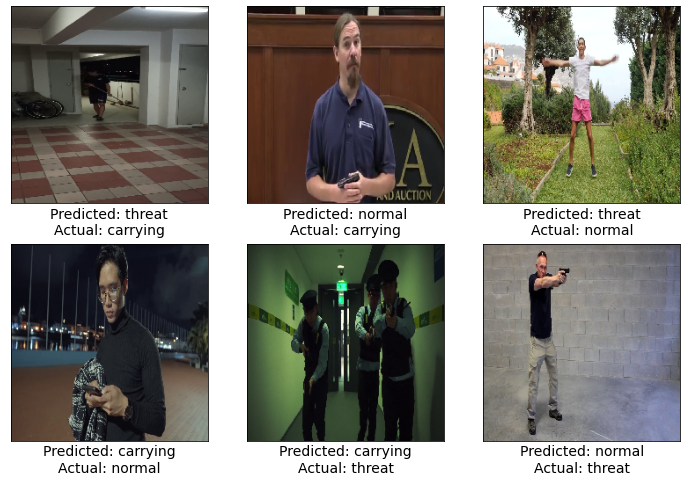

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(6):
    img, actual, predicted = lst[i]
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(img)
    plt.xlabel(f'Predicted: {predicted}\nActual: {actual}', fontsize=14)
    plt.xticks([])
    plt.yticks([])